1. Import Libraries

In [4]:
##import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import norm
import yfinance as yf

2. Load Data

In [8]:
MSFT = pd.read_csv('HistoricalData_MSFT_5Y.csv')
MSFT.info()
SPY = pd.read_csv('HistoricalData_SPY_5Y.csv')
SPY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1255 entries, 0 to 1254
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        1255 non-null   object
 1   Close/Last  1255 non-null   object
 2   Volume      1255 non-null   int64 
 3   Open        1255 non-null   object
 4   High        1255 non-null   object
 5   Low         1255 non-null   object
dtypes: int64(1), object(5)
memory usage: 59.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1255 entries, 0 to 1254
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1255 non-null   object 
 1   Close/Last  1255 non-null   float64
 2   Volume      1255 non-null   int64  
 3   Open        1255 non-null   float64
 4   High        1255 non-null   float64
 5   Low         1255 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 59.0+ KB


3. Clean and Prepare Data

In [3]:
##renaming columns
MSFT = MSFT.rename(columns={'Close/Last':'Close'})
SPY = SPY.rename(columns={'Close/Last':'Close'})

##removing $ from MSFT strings and convert to floats
##defining columns to fix
cols_to_fix = ['Close', 'Open', 'High', 'Low']

##defining function to remove $ from a column
def remove_usd(column):
    return column.str.replace('$', '')

##applying function to remove $s
MSFT[cols_to_fix] = MSFT[cols_to_fix].apply(remove_usd)

##converting strings to floats
MSFT[cols_to_fix] = MSFT[cols_to_fix].astype(float)


##converting Date to datetime, sorting chronologically and indexing by Date
##converting Date to datetime
MSFT['Date'] = pd.to_datetime(MSFT['Date'])
SPY['Date'] = pd.to_datetime(SPY['Date'])

##sorting by Date
MSFT = MSFT.sort_values(by = 'Date')
SPY = SPY.sort_values(by = 'Date')

##setting Date as index
MSFT = MSFT.set_index('Date')
SPY = SPY.set_index('Date')

4. Analyze and Summarize Data

In [4]:
##calculating and add the daily returns to the df
MSFT['Daily Returns'] = MSFT['Close'].pct_change()
SPY['Daily Returns'] = SPY['Close'].pct_change()

##dropping rows with NaN
MSFT = MSFT.dropna()
SPY = SPY.dropna()
##consider moving this to data preparation in another project

##computing descriptive statistics of the returns
MSFT_mean = MSFT['Daily Returns'].mean()
MSFT_std = MSFT['Daily Returns'].std()
MSFT_min = MSFT['Daily Returns'].min()
MSFT_max = MSFT['Daily Returns'].max()
MSFT_med = MSFT['Daily Returns'].median()
MSFT_skew = MSFT['Daily Returns'].skew()
MSFT_kurt = MSFT['Daily Returns'].kurt()

SPY_mean = SPY['Daily Returns'].mean()
SPY_std = SPY['Daily Returns'].std()
SPY_min = SPY['Daily Returns'].min()
SPY_max = SPY['Daily Returns'].max()
SPY_med = SPY['Daily Returns'].median()
SPY_skew = SPY['Daily Returns'].skew()
SPY_kurt = SPY['Daily Returns'].kurt()

##finding the correlation
MSFT_SPY_corr = MSFT['Daily Returns'].corr(SPY['Daily Returns'])

##now we want to create a new df with descriptive stats that is exportable
##first we define the data
data_desc_stats = {
  "Statistic": ['Mean', 'SD/Volatility', 'Min.', 'Max.', 'Median', 'Skewness', 'Kurtosis', 'Correlation'],
  "MSFT": [MSFT_mean, MSFT_std, MSFT_min, MSFT_max, MSFT_med, MSFT_skew, MSFT_kurt, MSFT_SPY_corr],
  "SPY": [SPY_mean, SPY_std, SPY_min, SPY_max, SPY_med, SPY_skew, SPY_kurt, MSFT_SPY_corr],
}

##creating the df and index the statistic
df_desc_stats = pd.DataFrame(data_desc_stats)
df_desc_stats = df_desc_stats.set_index('Statistic')
print(df_desc_stats)

##exporting the df to .csv
df_desc_stats.to_csv('desc_stats.csv')

                   MSFT       SPY
Statistic                        
Mean           0.000847  0.000590
SD/Volatility  0.016913  0.011078
Min.          -0.077156 -0.058543
Max.           0.101337  0.105019
Median         0.000748  0.000829
Skewness       0.133296  0.229886
Kurtosis       2.858630  8.138298
Correlation    0.768155  0.768155


5. Visualize Data

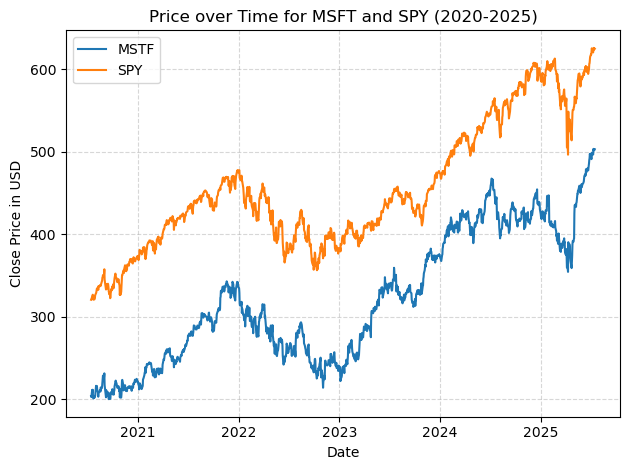

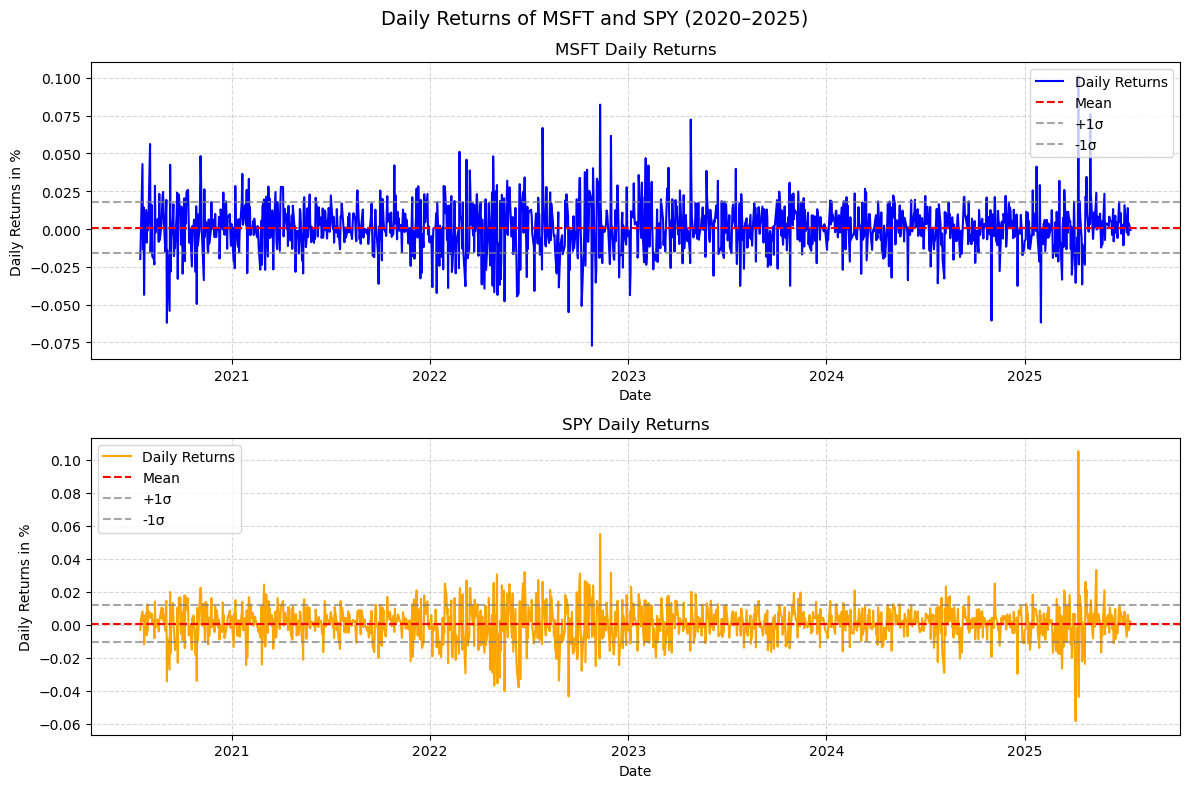

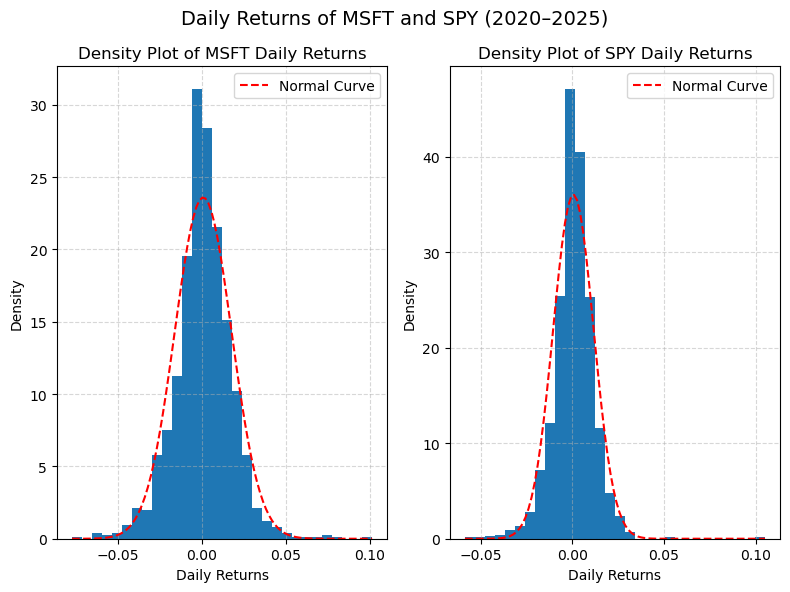

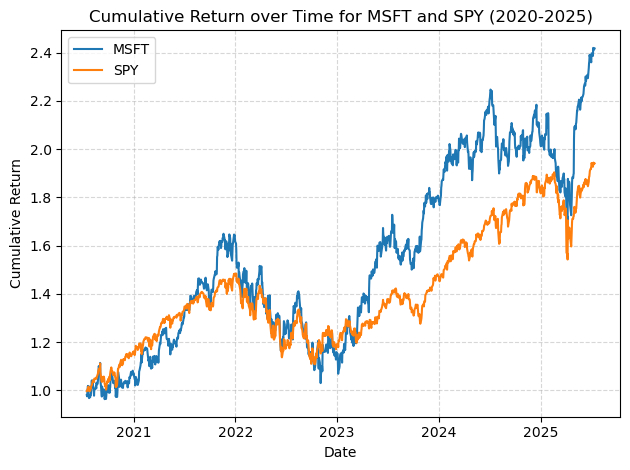

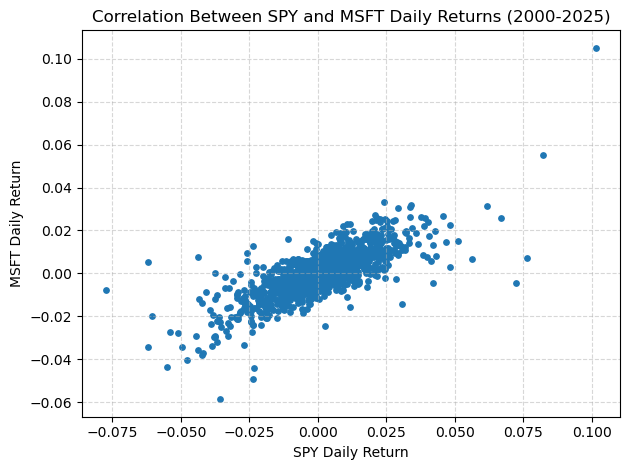

In [5]:
##using plt to make a plot showing price and date for both MSFT and SPY
##creating a figure with one x-axes and one y-axes in the standard size
fig, ax = plt.subplots()

##line chart for MSFT and SPY daily returns individually but in the same plot
ax.plot(MSFT.index, MSFT['Close'], label = 'MSTF')
ax.plot(SPY.index, SPY['Close'], label = 'SPY')

##fix labels
ax.set_xlabel('Date')
ax.set_ylabel('Close Price in USD')
ax.set_title('Price over Time for MSFT and SPY (2020-2025)')
ax.legend()

##layout
ax.grid(True, linestyle = '--', alpha = 0.5)
fig.tight_layout()

##save figure as .png
fig.savefig('price_chart.png', dpi = 300, bbox_inches = 'tight')

plt.show()


##creating a plot with daily returns and date for MSFT and SPY individually
##creating a figure with 2 y-axes
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (12, 8))

##creating the separate subplots by defining the correct axes
axes[0].plot(MSFT.index, MSFT['Daily Returns'], color = 'blue', label = 'Daily Returns')
axes[1].plot(SPY.index, SPY['Daily Returns'], color = 'orange', label = 'Daily Returns')

##adding respective means and SDs to plot and add legends
axes[0].axhline(MSFT_mean, color = 'red', linestyle = '--', label = 'Mean')
axes[0].axhline(MSFT_mean + MSFT_std, color = 'gray', linestyle = '--', alpha = 0.7, label = '+1σ')
axes[0].axhline(MSFT_mean - MSFT_std, color = 'gray', linestyle = '--', alpha = 0.7, label = '-1σ')
axes[0].legend()
axes[1].axhline(SPY_mean, color = 'red', linestyle = '--', label = 'Mean')
axes[1].axhline(SPY_mean + SPY_std, color = 'gray', linestyle = '--', alpha = 0.7, label = '+1σ')
axes[1].axhline(SPY_mean - SPY_std, color = 'gray', linestyle = '--', alpha = 0.7, label = '-1σ')
axes[1].legend()

##fix labels
fig.suptitle("Daily Returns of MSFT and SPY (2020–2025)", fontsize = 14)

axes[0].set_xlabel('Date')
axes[0].set_ylabel('Daily Returns in %')
axes[0].set_title('MSFT Daily Returns')

axes[1].set_xlabel('Date')
axes[1].set_ylabel('Daily Returns in %')
axes[1].set_title('SPY Daily Returns')

##layout
axes[0].grid(True, linestyle = "--", alpha = 0.5)
axes[1].grid(True, linestyle = "--", alpha = 0.5)
fig.tight_layout()

##save figure as .png
fig.savefig('returns_chart.png', dpi = 300, bbox_inches = 'tight')

plt.show()


##plotting histograms of daily returns for  MSFT and SPY individually
##creating a figure with 2 x-axes
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (8, 6))

##creating the separate histograms
axes[0].hist(MSFT['Daily Returns'], bins = 30, density = True)
axes[1].hist(SPY['Daily Returns'], bins = 30, density = True)

##matching the axes for comparability
##defining global min and max daily return
min_return = min(MSFT['Daily Returns'].min(), SPY['Daily Returns'].min())
max_return = max(MSFT['Daily Returns'].max(), SPY['Daily Returns'].max())

##setting limits for each histogram - excluded since it is a density plot, only used for absolute counts
##axes[0].set_xlim(min_return, max_return)
##axes[1].set_xlim(min_return, max_return)
##max_height_hist = 330
##axes[0].set_ylim(0, max_height_hist)
##axes[1].set_ylim(0, max_height_hist)

##adding the normal curve to each histogram
MSFT_x = np.linspace(MSFT_min, MSFT_max, 100)
MSFT_p = norm.pdf(MSFT_x, MSFT_mean, MSFT_std)
axes[0].plot(MSFT_x, MSFT_p, color = 'red', linestyle = '--', label = 'Normal Curve')
axes[0].legend()

SPY_x = np.linspace(SPY_min, SPY_max, 100)
SPY_p = norm.pdf(SPY_x, SPY_mean, SPY_std)
axes[1].plot(SPY_x, SPY_p, color = 'red', linestyle = '--', label = 'Normal Curve')
axes[1].legend()

##fix labels
fig.suptitle("Daily Returns of MSFT and SPY (2020–2025)", fontsize = 14)

axes[0].set_xlabel('Daily Returns')
axes[0].set_ylabel('Density')
axes[0].set_title('Density Plot of MSFT Daily Returns')

axes[1].set_xlabel('Daily Returns')
axes[1].set_ylabel('Density')
axes[1].set_title('Density Plot of SPY Daily Returns')

##layout
axes[0].grid(True, linestyle = "--", alpha = 0.5)
axes[1].grid(True, linestyle = "--", alpha = 0.5)
fig.tight_layout()

##save figure as .png
fig.savefig('returns_hist.png', dpi = 300, bbox_inches = 'tight')

plt.show()


##plotting the cumulative returns
##creating a figure
fig, ax = plt.subplots()

##calculating cumulative returns of each
MSFT['Cumulative Return'] = (MSFT['Daily Returns'] + 1).cumprod()
SPY['Cumulative Return'] = (SPY['Daily Returns'] + 1).cumprod()

##line chart for MSFT and SPY cumulative returns individually but in the same plot
ax.plot(MSFT.index, MSFT['Cumulative Return'], label = 'MSFT') 
ax.plot(SPY.index, SPY['Cumulative Return'], label = 'SPY')

##fix labels
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Return')
ax.set_title('Cumulative Return over Time for MSFT and SPY (2020-2025)')
ax.legend()

##layout
ax.grid(True, linestyle = '--', alpha = 0.5)
fig.tight_layout()

##save figure as .png
fig.savefig('cumulative_return_chart.png', dpi = 300, bbox_inches = 'tight')

plt.show()


##plotting the correlation between MSFT and SPY returns (beta)
##creating a figure
fig, ax = plt.subplots()

##scatterplot of daily returns
ax.scatter(MSFT['Daily Returns'], SPY['Daily Returns'], s = 15)
##ideally would add a linear regression line with slope (beta) to my plot, but a bit above my current level

##fix labels
ax.set_xlabel('SPY Daily Return')
ax.set_ylabel('MSFT Daily Return')
ax.set_title('Correlation Between SPY and MSFT Daily Returns (2000-2025)')

##layout
ax.grid(True, linestyle = '--', alpha = 0.5)
fig.tight_layout()

##save figure as .png
fig.savefig('returns_correlation.png', dpi = 300, bbox_inches = 'tight')

plt.show()

6. Estimate CAPM Regression

In [6]:
##we run OLS using sm to generate MSFT's historic alpha and beta
##as according to the CAPM regressionusing daily returns
##since they misalign, we must create a new df containing only daily returns
##from both that align and do not have NaNs
CAPM_df = pd.concat([MSFT['Daily Returns'], SPY['Daily Returns']], axis = 1).dropna()
CAPM_df.columns = ['MSFT', 'SPY']

##first we add a constant to our independent, SPY
CAPM_X = sm.add_constant(CAPM_df['SPY'])
CAPM_y = CAPM_df['MSFT']

##now we model the OLS and extract results
CAPM_model = sm.OLS(CAPM_y, CAPM_X).fit()
CAPM_result = CAPM_model.summary()
print(CAPM_result)


##now we want to create a new df with regression results that is exportable
##first we define the data
data_CAPM_result = {
  "Coefficient": ['Alpha', 'Beta', 'R2', 'Adj. R2', 'N'],
  "Estimate": [CAPM_model.params['const'], CAPM_model.params['SPY'], CAPM_model.rsquared, CAPM_model.rsquared_adj, CAPM_model.nobs],
  "p-value": [CAPM_model.pvalues['const'], CAPM_model.pvalues['SPY'], None, None, None],
}

##creating the df and index the statistic
df_CAPM_result = pd.DataFrame(data_CAPM_result)
df_CAPM_result = df_CAPM_result.set_index('Coefficient')
print(df_CAPM_result)

##exporting the df to .csv
df_CAPM_result.to_csv('CAPM_regression.csv')

                            OLS Regression Results                            
Dep. Variable:                   MSFT   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     1802.
Date:                Tue, 15 Jul 2025   Prob (F-statistic):          1.07e-244
Time:                        23:36:32   Log-Likelihood:                 3896.2
No. Observations:                1254   AIC:                            -7788.
Df Residuals:                    1252   BIC:                            -7778.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      0.505      0.6

7. Intepret and Conclude